## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

### 데이터 불러오기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAT/1차과제/customer_churn_dataset-testing-master.csv")
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


### EDA

* CustomerID: 고객 식별 번호
* Age: 고객 나이
* Gender: 고객 성별
* Tenure: 고객이 서비스를 이용한 기간
* Usage Frequency: 서비스 사용 빈도
* Support Calls: 고객 지원 센터에 전화한 횟수
* Payment Delay: 지불 지연 횟수
* Subscription Type: 구독 유형
* Contract Length: 계약 기간
* Total Spend: 총 지출 금액
* Last Interaction: 마지막 상호작용 시점
* Churn: 이탈 여부 (0: 이탈 x, 1: 이탈 o)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [39]:
print(df["Gender"].value_counts())
print("-------------------------")
print(df["Subscription Type"].value_counts())
print("-------------------------")
print(df["Contract Length"].value_counts())

Gender
Female    34353
Male      30021
Name: count, dtype: int64
-------------------------
Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64
-------------------------
Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64


In [40]:
df1 = pd.get_dummies(data=df,drop_first=True)
df1 = df1.astype(int)

<Axes: >

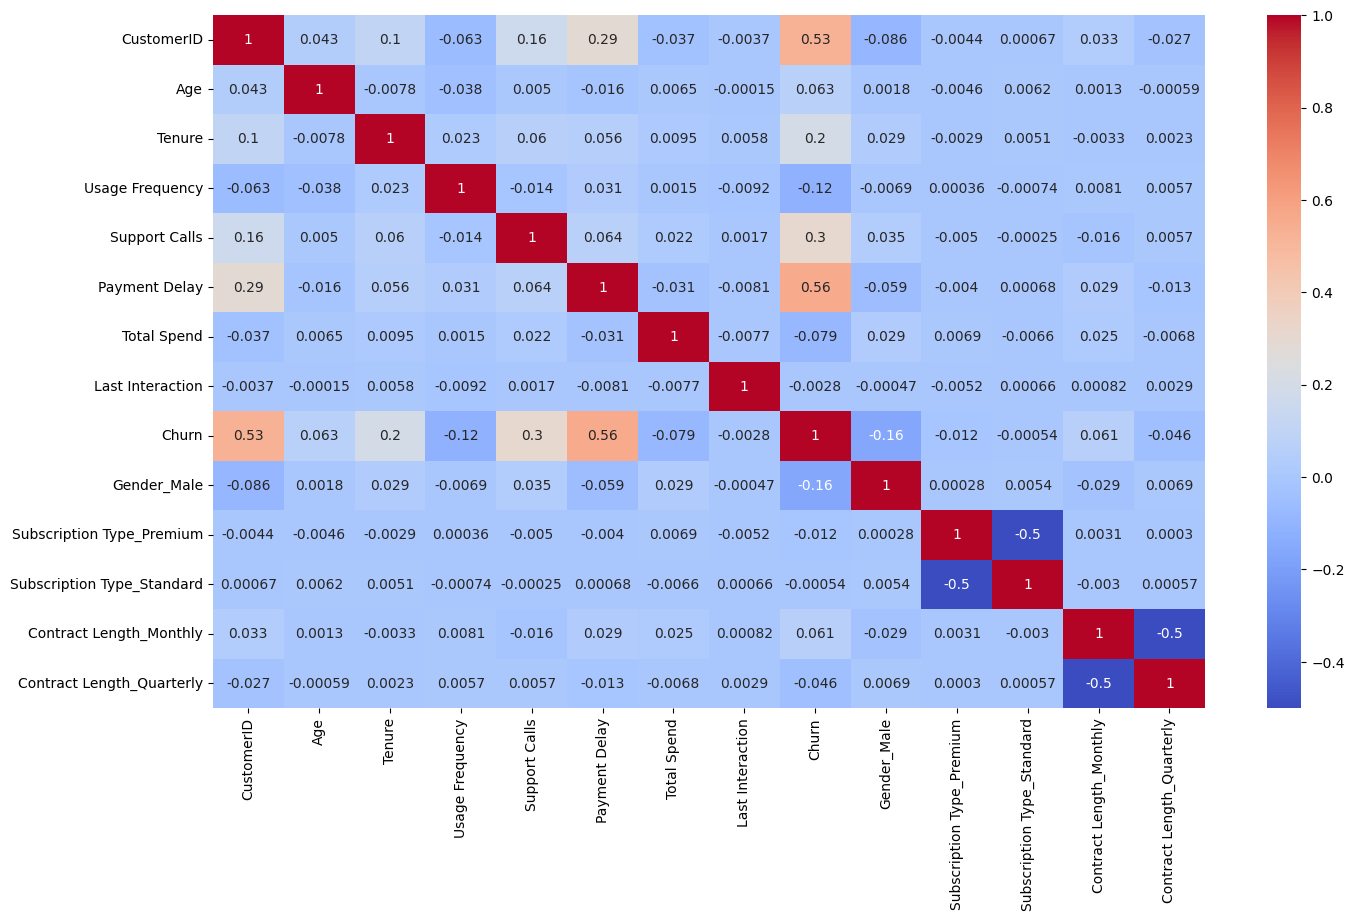

In [41]:
corr=df1.corr()

plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [43]:
total_customers = df.CustomerID.nunique()
churned_customers = df[df.Churn == 1]['CustomerID'].nunique()
churn_rate = churned_customers / total_customers

print("전체 이탈 고객 비율: {:.2f}%".format(churn_rate * 100))

전체 이탈 고객 비율: 47.37%


<ipython-input-44-bd1cecc961d6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Age', data=df, palette='Pastel2')


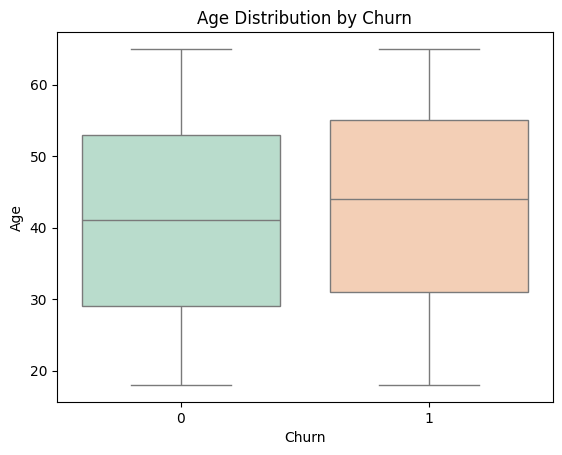

In [44]:
sns.boxplot(x='Churn', y='Age', data=df, palette='Pastel2')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Age Distribution by Churn')
plt.show()

<ipython-input-45-5f3fde895db7>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn_rate = df.groupby('AgeGroup')['Churn'].mean()
<ipython-input-45-5f3fde895db7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values, palette='Pastel2')


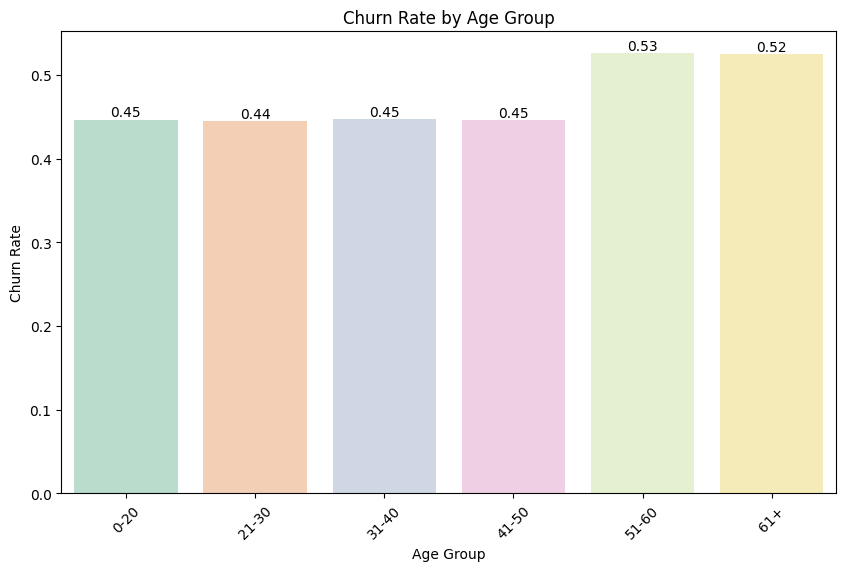

In [45]:
age_bin = [0, 20, 30, 40, 50, 60, float('inf')]
age_label = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bin, labels=age_label, right=False)
age_churn_rate = df.groupby('AgeGroup')['Churn'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values, palette='Pastel2')

# 비율 표시
for index, value in enumerate(age_churn_rate.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# 라벨 및 제목 설정
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

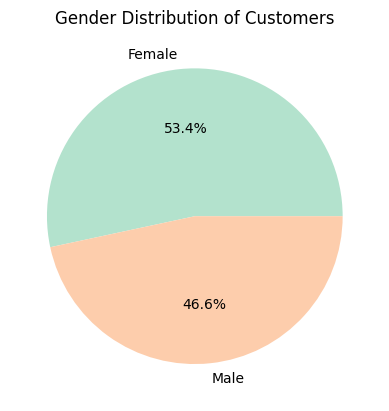

In [46]:
# 성별 분포 계산
gender_counts = df['Gender'].value_counts()

# 파이 차트 생성
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Pastel2'))

plt.title('Gender Distribution of Customers')
plt.show()

<ipython-input-47-483c0e0515bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='Pastel2')


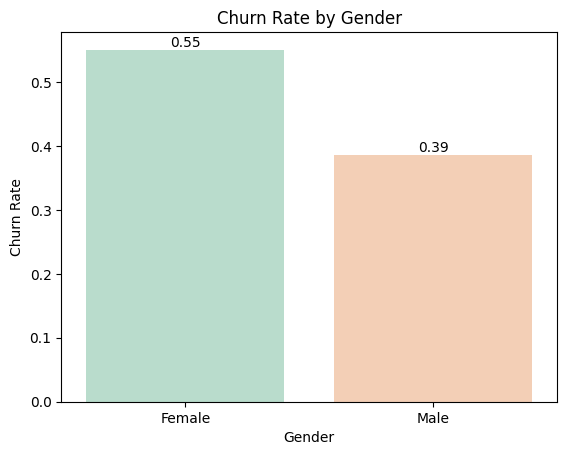

In [47]:
gender_churn_rate = df.groupby('Gender')['Churn'].mean()

sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='Pastel2')

# 비율 표시
for index, value in enumerate(gender_churn_rate.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()

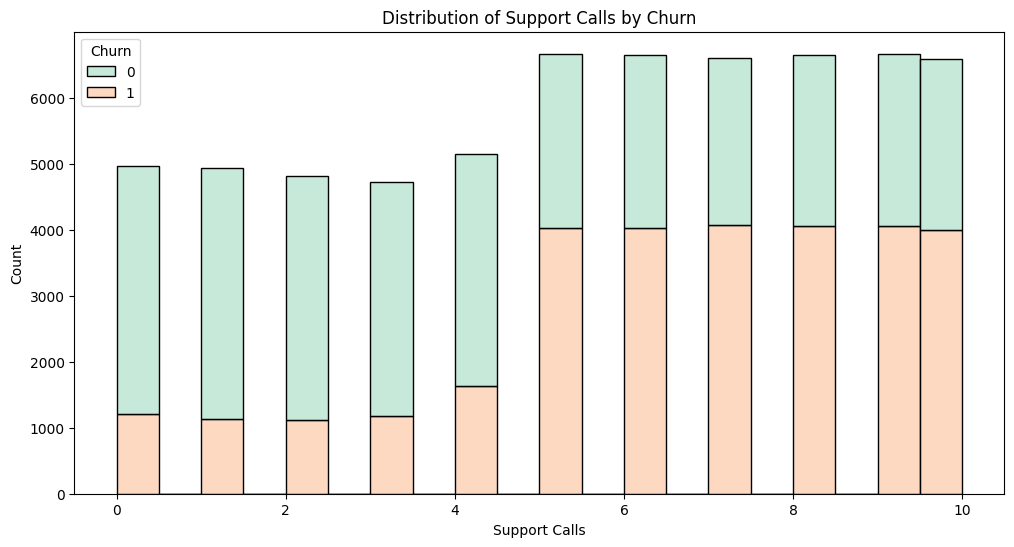

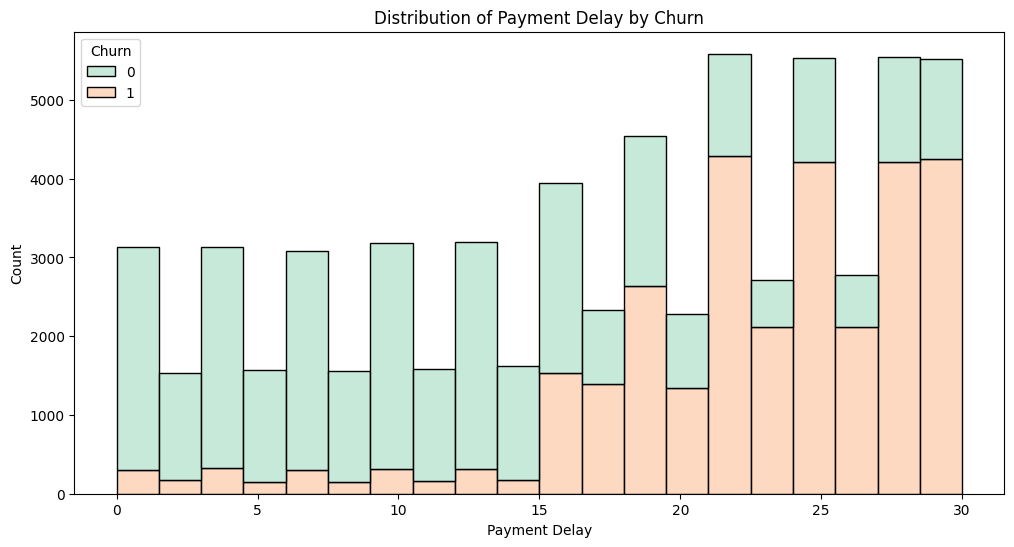

In [54]:
# Churn과 상대적으로 상관계수가 높은 두 변수에 Churn에 따른 분포 확인

# 'Support Calls' 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Support Calls', hue='Churn', multiple='stack', bins=20, palette='Pastel2')
plt.title('Distribution of Support Calls by Churn')
plt.show()

# 'Payment Delay' 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Payment Delay', hue='Churn', multiple='stack', bins=20, palette='Pastel2')
plt.title('Distribution of Payment Delay by Churn')
plt.show()

In [53]:
df = df.drop(['CustomerID', 'AgeGroup'], axis=1)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


## Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
LabelEncoder = LabelEncoder()

In [57]:
Categorical_col = []

object_cols = df.select_dtypes(include=['object']).columns
Categorical_col = list(object_cols)

In [58]:
Categorical_col

['Gender', 'Subscription Type', 'Contract Length']

In [59]:
for col in Categorical_col:
    df[col] = LabelEncoder.fit_transform(df[col])

In [60]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,0,757,21,0
3,35,1,9,12,5,17,1,2,232,18,0
4,53,0,58,24,9,2,2,0,533,18,0


## Modeling

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X = df.iloc[:,:-1]
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,0,25,14,4,27,0,1,598,9
1,41,0,28,28,7,13,2,1,584,20
2,47,1,27,10,2,29,1,0,757,21
3,35,1,9,12,5,17,1,2,232,18
4,53,0,58,24,9,2,2,0,533,18
...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,0,2,947,14
64370,37,1,6,1,5,22,2,0,923,9
64371,25,1,39,14,8,30,1,1,327,20
64372,50,0,18,19,7,22,2,1,540,13


In [99]:
y = df.iloc[:, -1]
y

,Churn
0,1
1,0
2,0
3,0
4,0
...,...
64369,1
64370,1
64371,1
64372,1


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### XGBoost

In [108]:
from xgboost import XGBClassifier

In [109]:
XGB = XGBClassifier()

In [110]:
XGB.fit(X_train, np.ravel(y_train))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [116]:
y_pred = XGB.predict(X_test)

## Model Evaluation

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score

In [118]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
ps = precision_score(y_test,y_pred)
rs = recall_score(y_test,y_pred)

results = pd.DataFrame([['XGBoost',acc,f1,ps,rs]],columns=['Model','Accuracy','F1_Score','Precision','Recall'])
results

,Model,Accuracy,F1_Score,Precision,Recall
0,XGBoost,0.999922,0.999918,0.999836,1.0


### LogisticRegression

In [119]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=18).fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
y_pred = clf.predict(X_test)

In [122]:
acc1 = accuracy_score(y_test,y_pred)
f11 = f1_score(y_test,y_pred)
ps1 = precision_score(y_test,y_pred)
rs1 = recall_score(y_test,y_pred)

lr_results = pd.DataFrame([['Logistic Regression',acc1,f11,ps1,rs1]],columns=['Model','Accuracy','F1_Score','Precision','Recall'])
results._append(lr_results,ignore_index=True)

,Model,Accuracy,F1_Score,Precision,Recall
0,XGBoost,0.999922,0.999918,0.999836,1.000000
1,Logistic Regression,0.829204,0.820504,0.814719,0.826373


### XGBoost가 더 좋은 성능을 낸다